In [1]:
import os
import tarfile
import urllib

In [2]:
URL = "https://github.com/ageron/data/raw/main/housing.tgz"
HOUSING_PATH=os.path.join("output", "housing")
def fetch_housing_data(url=URL):
    urllib.request.urlretrieve(url,"dane.tgz")
    
    with tarfile.open("dane.tgz") as housing_tgz:
        housing_tgz.extractall(path="output")
    housing_tgz.close()
fetch_housing_data()

C:\Users\OlekPC\AppData\Local\Temp\ipykernel_12960\3998667247.py:7: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path="output")


In [3]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

raw_data=load_housing_data()

In [4]:
raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
raw_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [7]:
raw_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

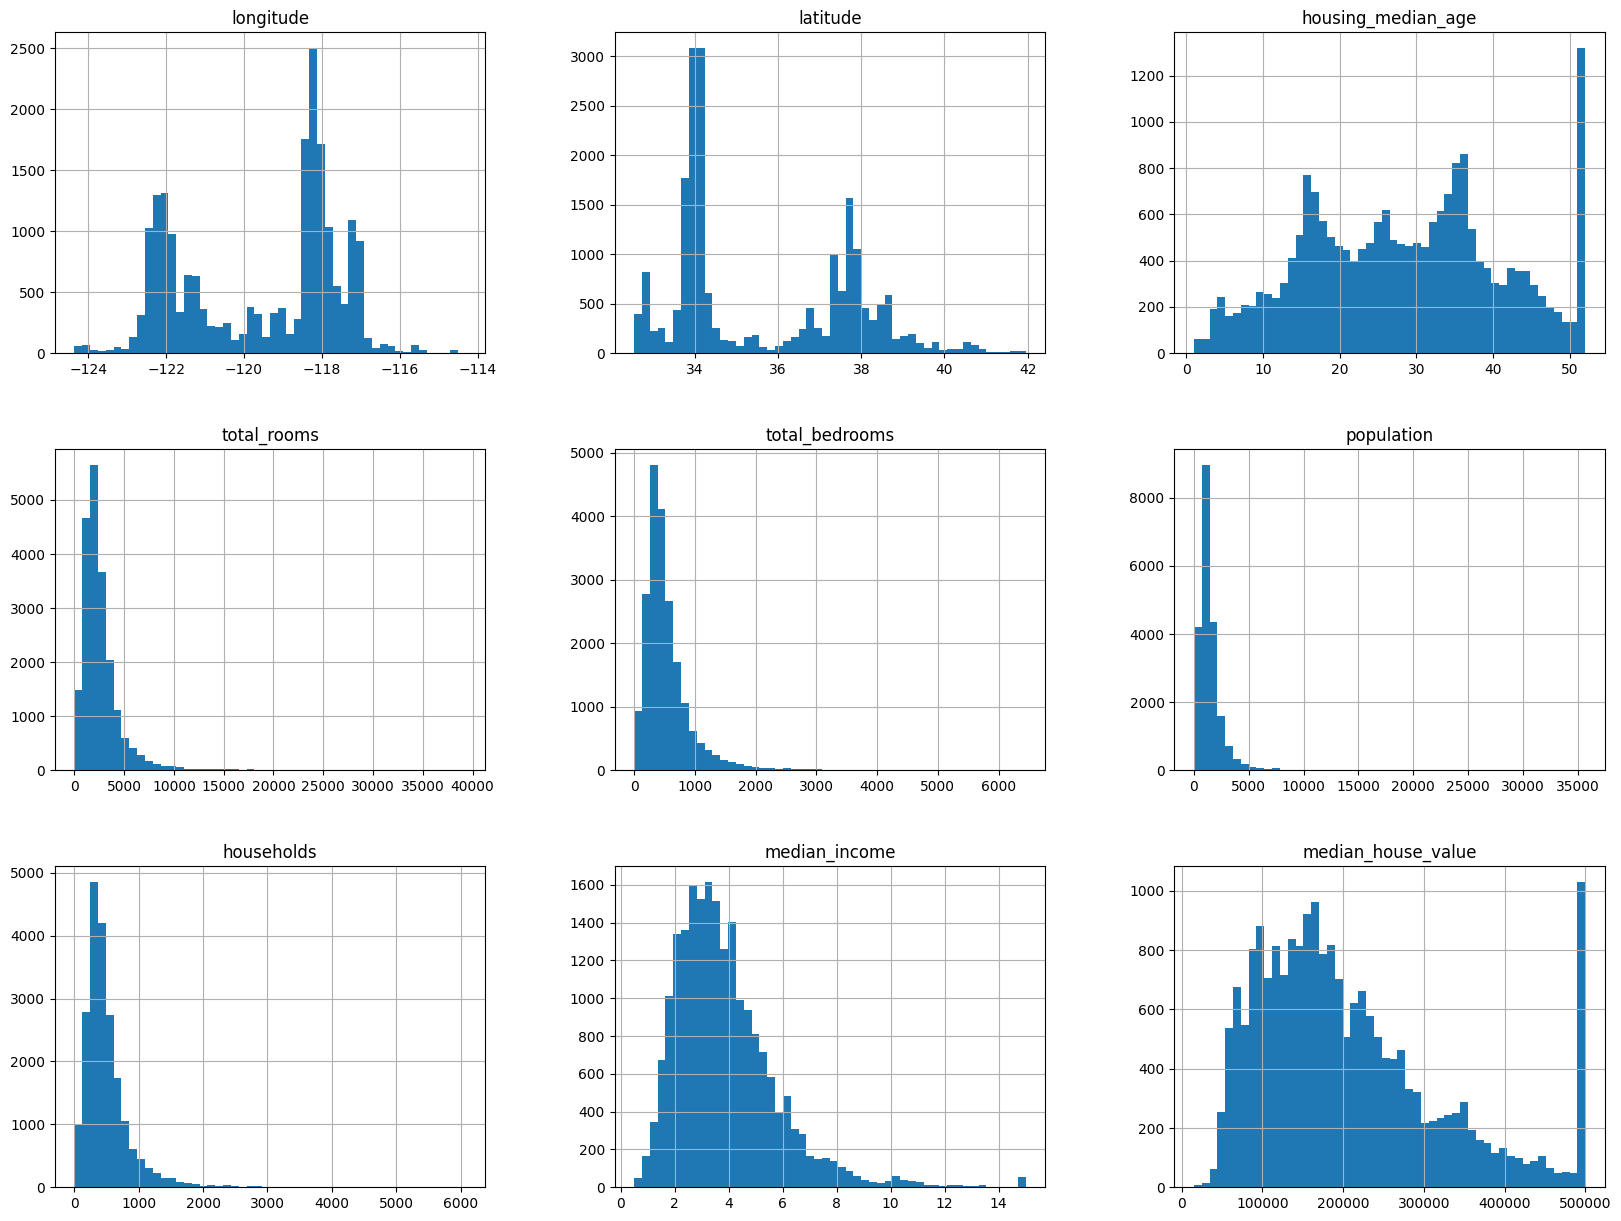

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
raw_data.hist(bins=50, figsize=(20,15))


In [9]:
from zlib import crc32
import numpy as np


def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) < test_ratio * 2**32

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id: test_set_check(id, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]  #return trainset and testset


In [10]:
raw_data_with_id = raw_data.reset_index()

#raw_data_with_id.head()
train_set, test_set = split_train_test_by_id(raw_data_with_id, 0.2, "index")



In [11]:
#raw_data_with_id["id"]= raw_data["longitude"] * 1000 + raw_data["latitude"]

#raw_data_with_id.head()

In [12]:

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(raw_data, test_size=0.2, random_state=42)


stratified sampling (by median income * 10000). proportion of income_cat categories is respected during sampling


<Axes: >

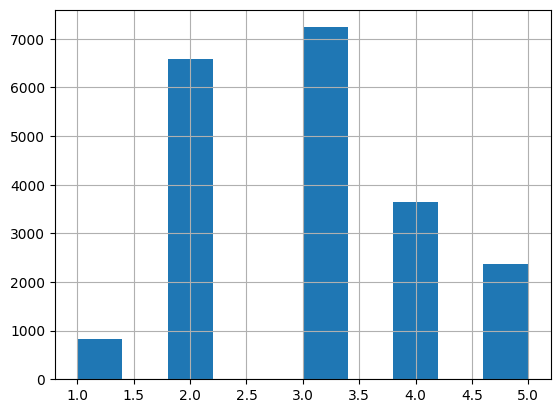

In [13]:
raw_data["income_cat"] = pd.cut(raw_data["median_income"],
                                bins=[0, 1.5, 3.0, 4.5, 6.0, np.inf],
                                labels=[1,2,3,4,5])

raw_data.head()

raw_data["income_cat"].hist()

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(raw_data, raw_data["income_cat"]):
    strat_train_set = raw_data.loc[train_index]
    strat_test_set = raw_data.loc[test_index]

strat_test_set["income_cat"].value_counts() / len(strat_test_set)



income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [15]:
raw_data["income_cat"].value_counts() / len(raw_data)

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

Data visualization

In [16]:
raw_data = strat_train_set.copy() #copy of a train set to make some experiments

<Axes: xlabel='longitude', ylabel='latitude'>

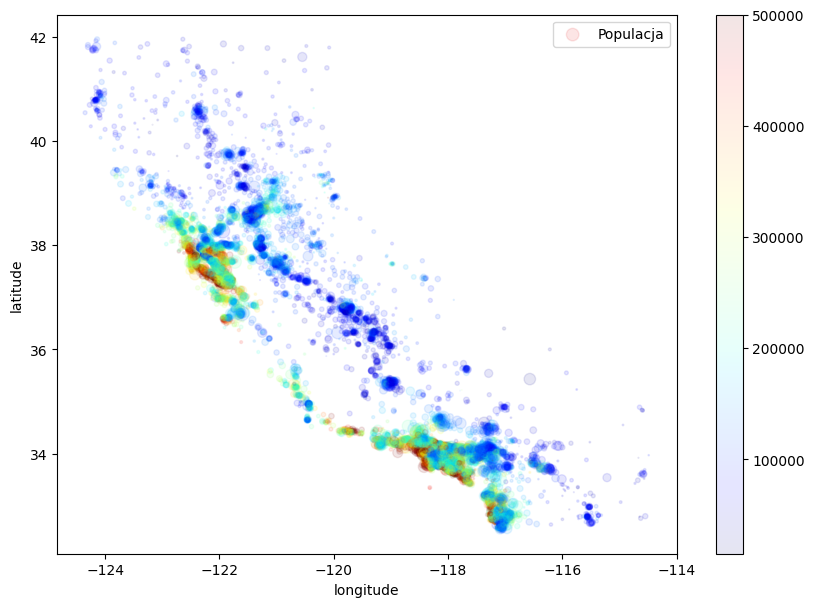

In [17]:
raw_data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1,
              s=raw_data["population"]/100, c=raw_data["median_house_value"], cmap=plt.get_cmap("jet"),
              label="Populacja", colorbar=True, figsize=(10,7))


In [18]:
corr_matrix=raw_data.corr(numeric_only=True)

corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

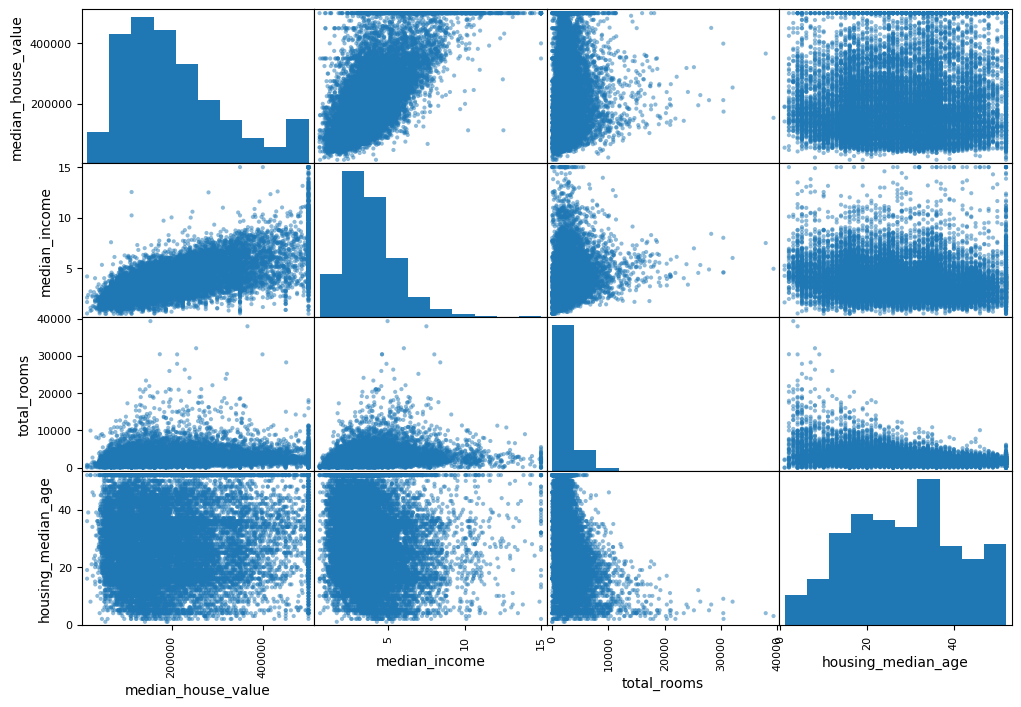

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(raw_data[attributes],figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

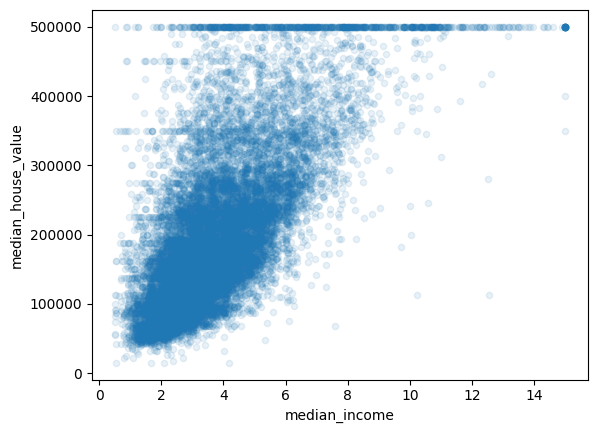

In [20]:
raw_data.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [21]:
raw_data.loc[raw_data["median_house_value"] >= 500002]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat


The horizontal line on chart is caused by upper limit of median house value equal 500001$

In [22]:
raw_data["rooms_per_family"] = raw_data["total_rooms"] / raw_data["households"]
raw_data["bedrooms_ratio"] = raw_data["total_bedrooms"] / raw_data["total_rooms"]
raw_data["population_per_households"] = raw_data["population"] / raw_data["households"]

corr_matrix = raw_data.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value           1.000000
median_income                0.688380
rooms_per_family             0.143663
total_rooms                  0.137455
housing_median_age           0.102175
households                   0.071426
total_bedrooms               0.054635
population                  -0.020153
population_per_households   -0.038224
longitude                   -0.050859
latitude                    -0.139584
bedrooms_ratio              -0.256397
Name: median_house_value, dtype: float64

New useful feature!

<Axes: xlabel='bedrooms_ratio', ylabel='median_house_value'>

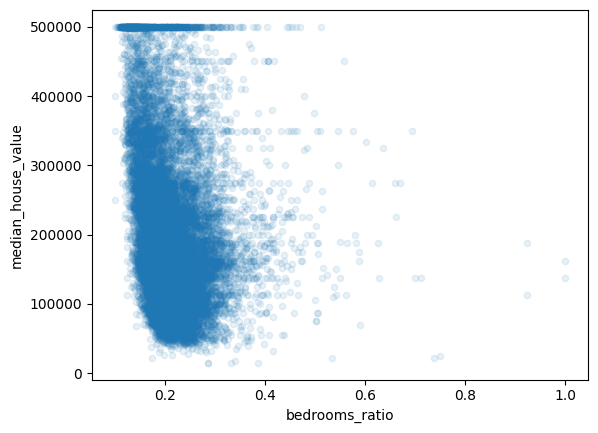

In [23]:
raw_data.plot(kind="scatter", x="bedrooms_ratio", y="median_house_value", alpha=0.1)


In [24]:
raw_data = strat_train_set.drop("median_house_value", axis=1)
raw_data_labels = strat_train_set["median_house_value"].copy()

raw_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,income_cat
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,2
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,INLAND,2
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,2
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3


replacing empty values with median

In [25]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = raw_data.select_dtypes(include=[np.number])

imputer.fit(housing_num)

imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [26]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [27]:
X = imputer.transform(housing_num)

In [28]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292


In [29]:
housing_cat = raw_data[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


translating non-numerical feature into numerical

In [30]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.],
       [0.],
       [0.]])

In [31]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [32]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [33]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [34]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        Rooms_per_household = X[:, rooms_ix] / X[:,households_ix]
        Population_per_household = X[:,population_ix] / X[:,households_ix]
        if self.add_bedrooms_per_room:
            Bedrooms_per_room = X[:,bedrooms_ix] / X[:,rooms_ix]
            return np.c_[X, Rooms_per_household, Population_per_household, Bedrooms_per_room]
        else:
            return np.c_[X, Rooms_per_household, Population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(raw_data.values)

pd.DataFrame(housing_extra_attribs)


,0,1,2,3,4,5,6,7,8,9,10,11
0,-122.42,37.8,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,NEAR BAY,2,3.211799,1.524178
1,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,<1H OCEAN,5,5.504202,1.865546
2,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.433,INLAND,2,5.334975,2.768473
3,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,INLAND,2,5.351282,2.365385
4,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,NEAR OCEAN,3,3.725256,1.631399
...,...,...,...,...,...,...,...,...,...,...,...,...
16507,-118.4,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105,<1H OCEAN,4,4.277247,1.793499
16508,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733,INLAND,2,5.535714,2.667293
16509,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616,NEAR OCEAN,3,5.157895,3.702632
16510,-118.4,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455,<1H OCEAN,3,4.511933,2.058473


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")), #filling the empty records
    ('attribs_adder', CombinedAttributesAdder()), #ading two or three new attributes
    #('std_scaler', StandardScaler()), #scaling
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

(np.float64(0.0), np.float64(2000.0), np.float64(0.0), np.float64(1200.0))

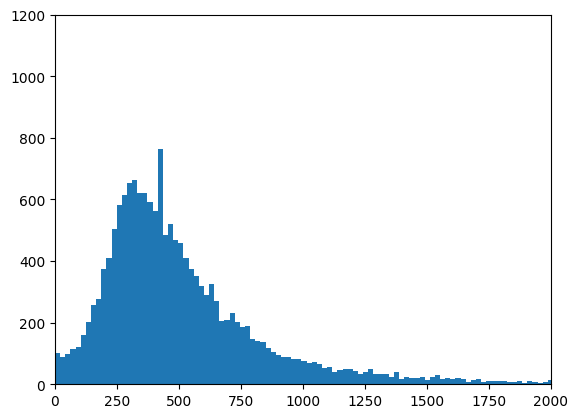

In [36]:
a = pd.DataFrame(housing_num_tr)

plt.hist(a[4], bins=300)
plt.axis([0,2000,0,1200])

In [37]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

housing_prepared = full_pipeline.fit_transform(raw_data)


Training the model

In [38]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, raw_data_labels)

some_data = raw_data.iloc[:5]
some_labels = raw_data_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)   #not fit_tranform cause we did train the pipeline in the previous step

print("Estimations: ", lin_reg.predict(some_data_prepared))

print("Labels: ", list(some_labels))

Estimations:  [276608.27419653 333603.03037722 118237.57260112 108255.75159888
 308943.82732348]
Labels:  [458300.0, 483800.0, 101700.0, 96100.0, 361800.0]


In [39]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(raw_data_labels, housing_predictions)
lin_rsme = np.sqrt(lin_mse)
lin_rsme

np.float64(67769.12117461127)

In [40]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, raw_data_labels)

DecisionTreeRegressor()

In [41]:
housing_predictions = tree_reg.predict(housing_prepared)

tree_mse = mean_squared_error(raw_data_labels, housing_predictions)

tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


10-fold cross-validation


In [42]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, raw_data_labels, scoring="neg_mean_squared_error", cv=10)

tree_rsme_scores = np.sqrt(-scores)
tree_rsme_scores


array([68535.96634685, 66469.48840376, 69260.61544725, 73156.87735918,
       69665.7220205 , 70777.27002072, 72292.14391538, 71128.53404038,
       71644.70445858, 69577.24011851])

In [43]:
def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Std: ", scores.std())

In [44]:
display_scores(tree_rsme_scores)

Scores:  [68535.96634685 66469.48840376 69260.61544725 73156.87735918
 69665.7220205  70777.27002072 72292.14391538 71128.53404038
 71644.70445858 69577.24011851]
Mean:  70250.85621311094
Std:  1860.6010960218687


In [45]:
lin_scores = cross_val_score(lin_reg, housing_prepared, raw_data_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores:  [69717.57852026 66650.26617871 66488.43193213 70478.22519838
 66837.93229332 68220.31091521 66922.70445332 69700.47781664
 67122.26131607 67802.47918508]
Mean:  67994.06678091249
Std:  1394.9377015502548


In [46]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, raw_data_labels)

housing_predictions = forest_reg.predict(housing_prepared)

forest_mse = mean_squared_error(raw_data_labels, housing_predictions)

forest_rmse = np.sqrt(forest_mse)
forest_rmse


np.float64(18536.01036906383)

In [47]:
forest_scores = cross_val_score(forest_reg, housing_prepared, raw_data_labels, scoring="neg_mean_squared_error", cv=10)

In [48]:
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores:  [48535.69402564 50220.21509123 47806.45545853 50359.77648253
 48975.12246415 49859.64008818 50386.63725496 51200.41638081
 49884.52517555 50258.36393721]
Mean:  49748.68463587847
Std:  961.3957772458713


Scores:  [48437.39657336 50190.6724757  47258.28507792 50313.90720975
48829.57577337 49702.04206608 50297.23020533 51565.53804182
50176.67217638 49450.65617388]
Mean:  49622.197577359024
Std:  1140.0524487894977

In [49]:
#import joblib

#joblib.dump(forest_reg, "dump_forest.pkl")

Adjusting the Model with GridSearchCV

In [50]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, raw_data_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [51]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [52]:
cvres = grid_search.cv_results_

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63401.18571562363 {'max_features': 2, 'n_estimators': 3}
55595.03393737239 {'max_features': 2, 'n_estimators': 10}
52550.40799826107 {'max_features': 2, 'n_estimators': 30}
59942.82409863714 {'max_features': 4, 'n_estimators': 3}
52823.7362205169 {'max_features': 4, 'n_estimators': 10}
50330.74430128474 {'max_features': 4, 'n_estimators': 30}
58422.49719110726 {'max_features': 6, 'n_estimators': 3}
52212.41092201499 {'max_features': 6, 'n_estimators': 10}
49594.37503718297 {'max_features': 6, 'n_estimators': 30}
59493.07361075797 {'max_features': 8, 'n_estimators': 3}
51834.98232912349 {'max_features': 8, 'n_estimators': 10}
49789.36505688559 {'max_features': 8, 'n_estimators': 30}
61318.498322294145 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54243.12404460369 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60661.50824545355 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52456.67153406197 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

In [53]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([7.48675180e-02, 6.67386382e-02, 4.50301196e-02, 1.73005409e-02,
       1.61492996e-02, 1.79602101e-02, 1.58021178e-02, 3.54386505e-01,
       4.28104389e-02, 1.06666988e-01, 7.52532663e-02, 1.38145821e-02,
       1.43437164e-01, 2.09776793e-04, 3.18758464e-03, 6.38524944e-03])

In [54]:
extra_attribs = ["Rooms_per_household", "Population_per_household", "Bedrooms_ratio"]
cat_endoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_endoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(np.float64(0.35438650536786764), 'median_income'),
 (np.float64(0.14343716396921785), 'INLAND'),
 (np.float64(0.10666698845039727), 'Population_per_household'),
 (np.float64(0.07525326627915628), 'Bedrooms_ratio'),
 (np.float64(0.07486751799145586), 'longitude'),
 (np.float64(0.06673863817837516), 'latitude'),
 (np.float64(0.045030119593485164), 'housing_median_age'),
 (np.float64(0.042810438853198116), 'Rooms_per_household'),
 (np.float64(0.017960210089859454), 'population'),
 (np.float64(0.01730054088594581), 'total_rooms'),
 (np.float64(0.016149299552127603), 'total_bedrooms'),
 (np.float64(0.015802117814260382), 'households'),
 (np.float64(0.013814582102567143), '<1H OCEAN'),
 (np.float64(0.0063852494435386025), 'NEAR OCEAN'),
 (np.float64(0.0031875846359157587), 'NEAR BAY'),
 (np.float64(0.00020977679263203456), 'ISLAND')]

In [55]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis =1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predicitons = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predicitons)
final_rmse = np.sqrt(final_mse)
final_rmse

np.float64(49959.55523505712)

In [56]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predicitons - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc = squared_errors.mean(), scale = stats.sem(squared_errors)))

array([47638.42754095, 52177.52907139])